In [5]:
from scipy import fftpack
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df  =pd.read_csv('/Users/atufasheen/Desktop/projects/meiro_work/EP1_Stationary on mobile phone stand on table, slight tilt-jerk at the end.csv',
                    sep=';',names=['time','type','x','y','z','ang_x','ang_y','ang_z'])
df.shape[0]

108723

In [28]:
df.head(3)

,time,type,x,y,z,ang_x,ang_y,ang_z
0,45405604266664,ACC,0.154587,7.270157,6.135773,0.0,0.0,0.0
1,45405606769106,ACC,0.113876,7.368317,6.121399,0.0,0.0,0.0
2,45405609271547,ACC,0.057617,7.419800,6.127396,0.0,0.0,0.0


In [29]:
df[(df['time'] >=45405606769106) & (df['time']<=45405606769106+ 1e+9)]

,time,type,x,y,z,ang_x,ang_y,ang_z
1,45405606769106,ACC,0.113876,7.368317,6.121399,0.000000,0.000000,0.000000
2,45405609271547,ACC,0.057617,7.419800,6.127396,0.000000,0.000000,0.000000
3,45405611773989,ACC,0.067200,7.394653,6.077118,0.000000,0.000000,0.000000
4,45405614277065,ACC,0.061203,7.393463,6.123795,0.000000,0.000000,0.000000
5,45405616810024,ACC,0.071976,7.389862,6.122604,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
1283,45406601856411,GYRO_UN,0.000854,-0.000946,-0.000366,-0.003555,0.000305,-0.000626
1284,45406605793178,ACC,0.097122,7.376694,6.184845,0.000000,0.000000,0.000000
1285,45406604389370,GYRO,-0.000916,-0.000183,0.002396,0.000000,0.000000,0.000000
1286,45406604389370,GYRO_UN,-0.004471,0.000122,0.001770,-0.003555,0.000305,-0.000626


In [19]:
n = df['time'].iloc[0]
avgs = []
while n < df['time'].iloc[-1]:
    recs = len(df[(df['time'] >n) & (df['time']<n+ 1e+9)])
    avgs.append(recs)
    n= n+1e+9

In [17]:
np.mean(avgs)

1376.240506329114

In [22]:
def fft_signal(signal):
    mean = signal.mean()
    sig =signal-mean #normalization
    time_step = 1./1376
    time_vec  = df['time']
    sig_fft = fftpack.rfft(sig)
    amplitude  = np.abs(sig_fft)
    power = amplitude**2
    angle  = np.angle(sig_fft)
    sample_freq = fftpack.rfftfreq(sig.size,d=time_step)
    amp_freq = np.array([amplitude,sample_freq])
    return sample_freq,amp_freq

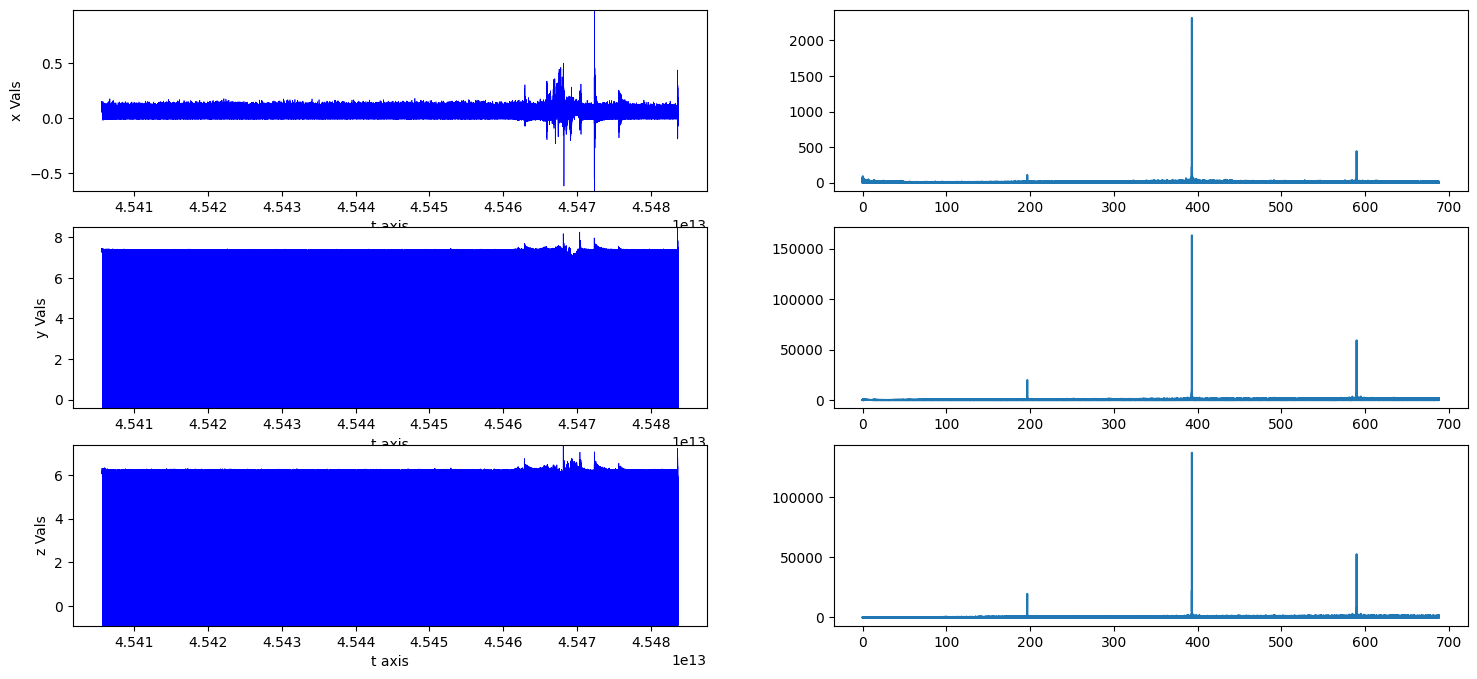

In [23]:
accs = ['x','y','z']
fig, ax = plt.subplots(3,2,figsize=(18,8))
for i in range(len(accs)):
    signal  = df[accs[i]].values
    time  = df['time'].values
    sample_freq,amp_freq = fft_signal(signal)
    minsignal, maxsignal = signal.min(), signal.max()

    ax[i,0].plot(time, signal, color='b', lw=0.5, label='Noisy Signal')
    ax[i,0].set_ylim([minsignal, maxsignal])
    ax[i,0].set_xlabel('t axis')
    ax[i,0].set_ylabel(f'{accs[i]} Vals')
    ax[i,1].plot(sample_freq,amp_freq[0,:],label = 'psd')
# fig.savefig('output/stationary')

In [30]:
df  =pd.read_csv('/Users/atufasheen/Desktop/projects/meiro_work/EP2_Phone in hand_Walking slowly.csv',
                    sep=';',names=['time','type','x','y','z','ang_x','ang_y','ang_z'])
df.head()

,time,type,x,y,z,ang_x,ang_y,ang_z
0,48015588434035,ACC,-0.315872,2.605057,9.399063,0.0,0.0,0.0
1,48015590966994,ACC,-0.271591,2.643356,9.511597,0.0,0.0,0.0
2,48015593469436,ACC,-0.239258,2.710403,9.498428,0.0,0.0,0.0
3,48015595971877,ACC,-0.215317,2.687653,9.561874,0.0,0.0,0.0
4,48015598474319,ACC,-0.242859,2.673294,9.570251,0.0,0.0,0.0


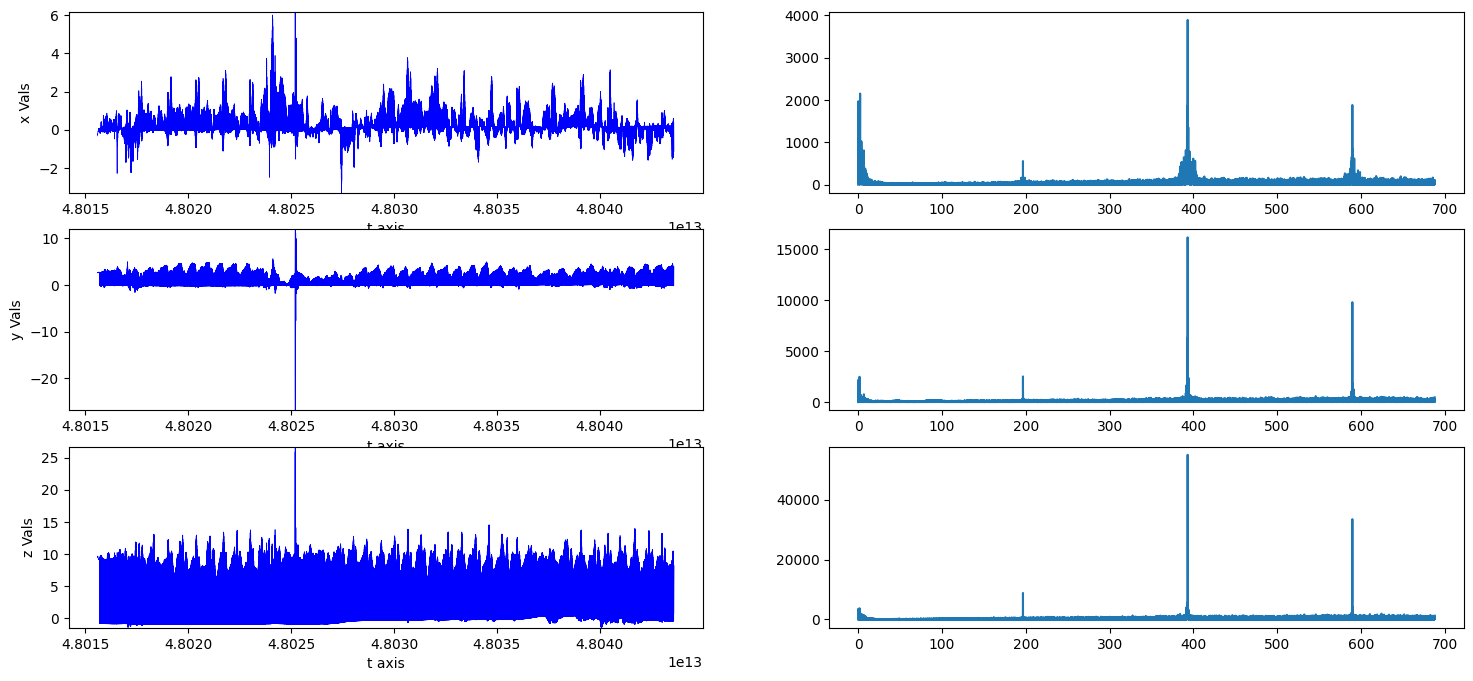

In [31]:
accs = ['x','y','z']
fig, ax = plt.subplots(3,2,figsize=(18,8))
for i in range(len(accs)):
    signal  = df[accs[i]].values
    time  = df['time'].values
    sample_freq,amp_freq = fft_signal(signal)
    minsignal, maxsignal = signal.min(), signal.max()

    ax[i,0].plot(time, signal, color='b', lw=0.5, label='Noisy Signal')
    ax[i,0].set_ylim([minsignal, maxsignal])
    ax[i,0].set_xlabel('t axis')
    ax[i,0].set_ylabel(f'{accs[i]} Vals')
    ax[i,1].plot(sample_freq,amp_freq[0,:],label = '')
# fig.savefig('output/stationary')

### finding peaks
try:
z-score one: https://stackoverflow.com/questions/22583391/peak-signal-detection-in-realtime-timeseries-data

scipy one: https://stackoverflow.com/questions/35282456/find-local-maximums-in-numpy-array

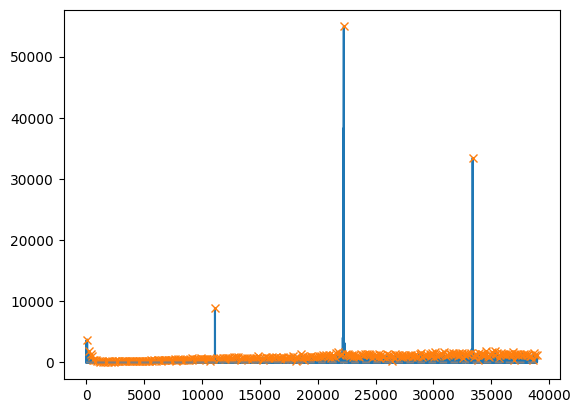

In [32]:
x = amp_freq[0,:]
# x = sample_freq
from scipy.signal import find_peaks
peaks, _ = find_peaks(x, distance=200/2)
plt.plot(x,)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [37]:
import numpy as np
y = amp_freq[0,:]
slope = [np.sign(y[i]-y[i-1]) for i in range(1, len(y))]

In [38]:
y[19473], y[19472]

(807.0175338908939, 144.55791023403862)

In [39]:
import scipy
g = scipy.signal.argrelextrema(x, np.greater)

In [41]:
len(g[0])

13029